In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../build_root/results/nasus/results.csv')

In [3]:
df.head()

,branch,samples,seed,selectivity,parallelism,read_ios,write_ios,hit_rate,heap_blks_hit,heap_blks_read,idx_blks_hit,idx_blks_read,blk_read_time
0,pbm1,NaN,15930,0.1,32,126857453.0,7566.0,0.524463,191211383,173373385,312637,31984,2.942855e+07
1,pbm2,20.0,9774,0.1,128,196828099.0,10888.0,0.834983,887521642,175399958,613818,389678,4.901991e+07
2,pbm1,NaN,4448,0.1,128,174343412.0,18526.0,0.744545,432937894,148542010,528294,20088,5.385444e+07
3,base,NaN,15930,0.1,32,121156888.0,9206.0,0.519433,184894871,171060009,332910,3088,2.800576e+07
4,pbm2,20.0,9774,0.1,64,177945313.0,14215.0,0.772653,687788535,202376713,452391,387505,3.812105e+07


In [21]:
df['variation'] = df['branch'].astype(str) + ' ' + df['samples'].astype(str)
df['total_io_read_blks'] = df['idx_blks_read'] + df['heap_blks_read']
df['total_processed_blks'] = df['total_io_read_blks'] + df['idx_blks_hit'] + df['heap_blks_hit']
df['io_gb'] = df['total_io_read_blks'] * 8 / (2 ** 20)
df['total_gb'] = df['total_processed_blks'] * 8 / (2 ** 20)
df['io_per_blk'] = df['io_gb'] / ((df['total_processed_blks'] * 8 * 1024) / (2**30))

labelmap = {
    'base nan': 'Clock-Sweep', 
    'pbm1 nan': 'PQ', 
    'pbm2 1.0': 'Random', 
    'pbm2 10.0': 'PBM (10)', 
    'pbm2 20.0': 'PBM (20)',
}
markermap = {
    'base nan': 'o', 
    'pbm1 nan': 'x', 
    'pbm2 1.0': 'v', 
    'pbm2 10.0': '^', 
    'pbm2 20.0': 's'
}

df['label'] = df['variation'].map(labelmap)
    
    

In [22]:
df

,branch,samples,seed,selectivity,parallelism,read_ios,write_ios,hit_rate,heap_blks_hit,heap_blks_read,idx_blks_hit,idx_blks_read,blk_read_time,total_io_read_blks,total_processed_blks,io_gb,total_gb,variation,io_per_blk,label
0,pbm1,NaN,15930,0.1,32,126857453.0,7566.0,0.524463,191211383,173373385,312637,31984,2.942855e+07,173405369,364929389,1322.977974,2784.190285,pbm1 nan,0.475175,PQ
1,pbm2,20.0,9774,0.1,128,196828099.0,10888.0,0.834983,887521642,175399958,613818,389678,4.901991e+07,175789636,1063925096,1341.168488,8117.104309,pbm2 20.0,0.165227,PBM (20)
2,pbm1,NaN,4448,0.1,128,174343412.0,18526.0,0.744545,432937894,148542010,528294,20088,5.385444e+07,148562098,582028286,1133.438858,4440.523422,pbm1 nan,0.255249,PQ
3,base,NaN,15930,0.1,32,121156888.0,9206.0,0.519433,184894871,171060009,332910,3088,2.800576e+07,171063097,356290878,1305.107857,2718.283676,base nan,0.480122,Clock-Sweep
4,pbm2,20.0,9774,0.1,64,177945313.0,14215.0,0.772653,687788535,202376713,452391,387505,3.812105e+07,202764218,891005144,1546.968216,6797.829773,pbm2 20.0,0.227568,PBM (20)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,base,NaN,9774,0.1,64,166113899.0,13671.0,0.631164,344683705,201424647,513188,2254,4.164061e+07,201426901,546623794,1536.765297,4170.408585,base nan,0.368493,Clock-Sweep
91,base,NaN,19357,0.1,32,117214155.0,9522.0,0.540400,205733116,174972068,358144,2261,2.763750e+07,174974329,381065589,1334.948189,2907.299721,base nan,0.459171,Clock-Sweep
92,base,NaN,4448,0.1,32,122901269.0,8025.0,0.499021,174089435,174772389,326870,3383,2.833501e+07,174775772,349192077,1333.433319,2664.124123,base nan,0.500515,Clock-Sweep
93,pbm2,10.0,19357,0.1,32,136860220.0,15002.0,0.716362,401861880,159114056,333561,196278,2.471466e+07,159310334,561505775,1215.441391,4283.949089,pbm2 10.0,0.283720,PBM (10)


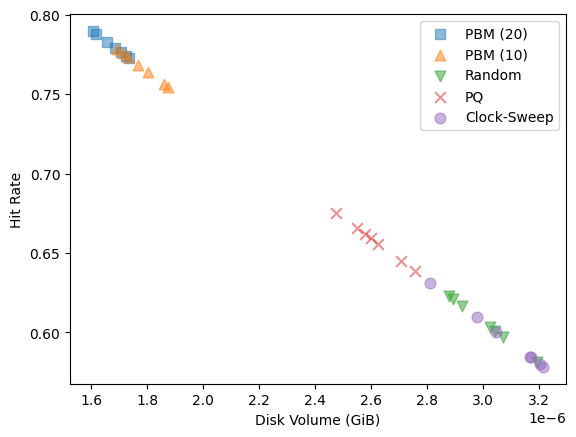

In [10]:
import matplotlib.pyplot as plt 

filtered = df[df['parallelism'] == 64]

variations = filtered['variation'].unique()
for variation in variations: 
    data = filtered[filtered['variation'] == variation]
    
    
    x = data['io_per_blk']
    y = data['hit_rate']
    
    avg_x = x.mean()
    avg_y = y.mean()
    plt.scatter(x, y, label=labelmap[variation], marker=markermap[variation], s=60, alpha=0.5)
    # plt.scatter(avg_x, avg_y, label=labelmap[variation], marker=markermap[variation], s=100, alpha=1)
    

plt.xlabel('Disk Volume (GiB)')
plt.ylabel('Hit Rate')
# increase resolution: 
plt.legend()

In [23]:
pivot_table_kwargs = {}
pivot_table_kwargs['columns'] = 'label'
pivot_table_kwargs['index'] = 'parallelism'
pivot_table_kwargs['values'] = 'io_per_blk'

tmean = pd.pivot_table(df, **pivot_table_kwargs, aggfunc='mean')
tmin = pd.pivot_table(df, **pivot_table_kwargs, aggfunc='min')
tmax = pd.pivot_table(df, **pivot_table_kwargs, aggfunc='max')

In [24]:
tmean

label,Clock-Sweep,PBM (10),PBM (20),PQ,Random
parallelism,,,,,
32,0.489313,0.295785,0.273588,0.453296,0.505014
64,0.404168,0.233004,0.219791,0.342495,0.393564
128,0.321487,0.180161,0.176032,0.252106,0.282629


<AxesSubplot: title={'center': 'IO GiB per 1GiB of Processed Data'}, xlabel='parallelism'>

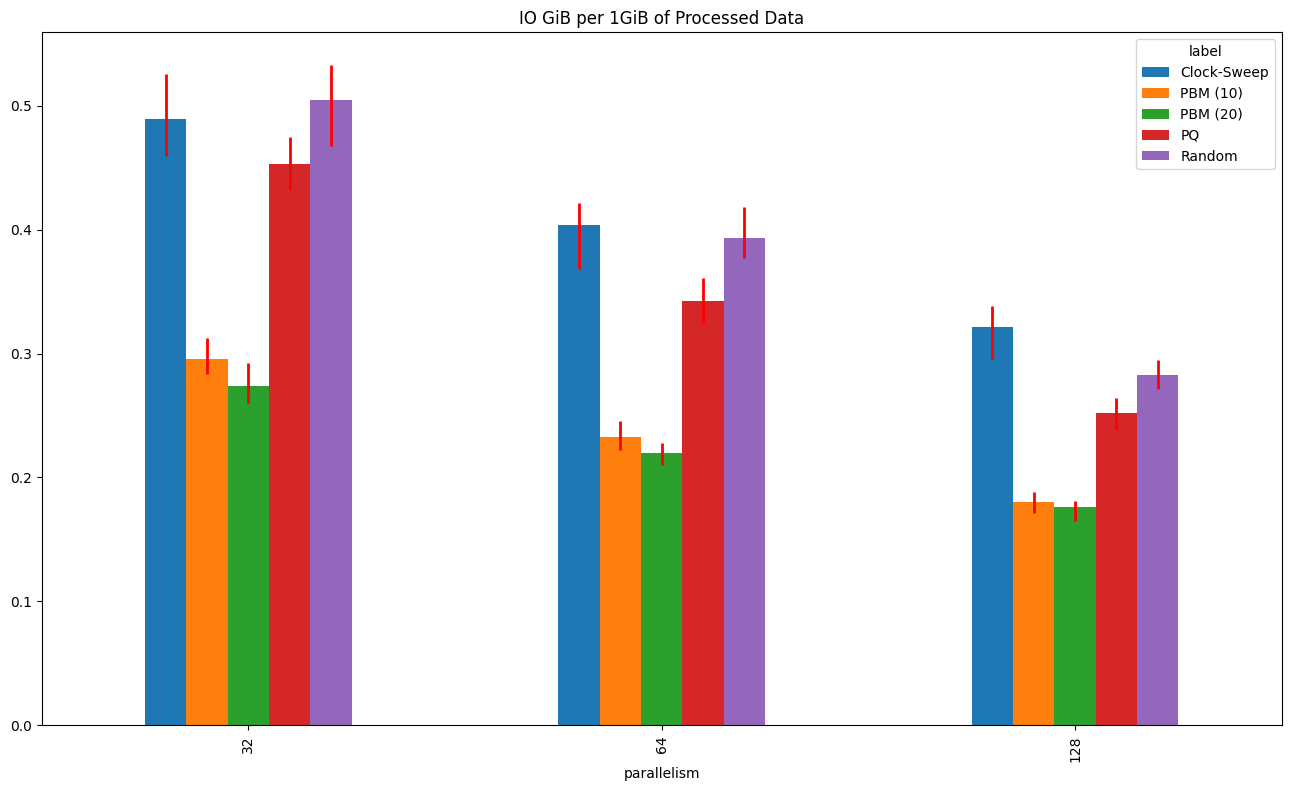

In [26]:
def calc_error_bars(tmean: pd.DataFrame, tmin: pd.DataFrame, tmax: pd.DataFrame) -> pd.DataFrame: 
    tpos_err = tmax - tmean
    tneg_err = tmean - tmin
    err = [[tneg_err[c], tpos_err[c]] for c in tmean]

    return err

err = calc_error_bars(tmean, tmin, tmax)

tmean.plot(
    kind='bar', 
    figsize=(16,9), 
    title='IO GiB per 1GiB of Processed Data',
    yerr=err, 
    error_kw=dict(elinewidth=2, ecolor='red')
)